In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Data Mining Project

### Data Exploration

In [7]:
# read data
file = 'game_teams_stats.csv'

#read CSV into df
data = pd.read_csv(file)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


#### Preprocessing

##### Explanation of all stats:

| Nr  | Stat  | Explanation  |
|---|---|---|
| 1  | game_id  |   |
| 2  | team_id  |   |
|  3 | HoA  | Home or Away  |
| 4  |  won |  True/False  |
| 5  |  settled_in | game ended in regulation or overtime (REG/OT)  |
| 6  | head_coach  | name of head coach  |
|  7 | goals  |  goals scored by team |
| 8  | shots   | shots on goal  |
| 9  | hits  | hits (tackles) by team  |
| 10  | pim  |  Penalties In Minutes (a regular penalty is 2 minutes) |
| 11  | powerPlayOpportunities  | opportunities where the other team has a penalty (eg 5v4, 5v3 or 4v3 advantage)  |
|  12 | powerPlayGoals  | goals scored in powerplay  |
|  13 |  powerPlayPercentage | PPG / PPO  |
|  14 | faceOffWinPercentage  | percentage of faceoffs won  |
| 15  | giveaways  |  puck possessions lost to other team |
| 16  | takeaways  | puck possessions won from other team  |
| 17  |  blocked | blocked shots by skaters (not goalie)  |
| 18  | startRinkSide  |  Left/Right |


In [21]:
data = data.dropna()    #dropping rows with NA-values reduced entries from 52610 to 29554

#create a column for pp%
data['powerPlayPercentage'] = (data['powerPlayGoals'] / data['powerPlayOpportunities'])

#reorder columns
column_order = ['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'powerPlayPercentage', 'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'startRinkSide']
data = data[column_order]
data.info()



#make an aleternative df where numerical values are normalized to [0, 1]
scaler = MinMaxScaler()
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_norm = data.copy()
data_norm[num_cols] = scaler.fit_transform(data[num_cols])
data_norm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28970 entries, 0 to 52609
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 28970 non-null  int64  
 1   team_id                 28970 non-null  int64  
 2   HoA                     28970 non-null  object 
 3   won                     28970 non-null  bool   
 4   settled_in              28970 non-null  object 
 5   head_coach              28970 non-null  object 
 6   goals                   28970 non-null  float64
 7   shots                   28970 non-null  float64
 8   hits                    28970 non-null  float64
 9   pim                     28970 non-null  float64
 10  powerPlayOpportunities  28970 non-null  float64
 11  powerPlayGoals          28970 non-null  float64
 12  powerPlayPercentage     28970 non-null  float64
 13  faceOffWinPercentage    28970 non-null  float64
 14  giveaways               28970 non-null

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,powerPlayPercentage,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,0.665901,0.056604,away,False,REG,Dave Hakstol,0.4,0.217949,0.383562,0.032787,0.272727,0.333333,0.500000,0.515411,0.333333,0.290323,0.177419,left
1,0.665901,0.283019,home,True,REG,Joel Quenneville,0.7,0.230769,0.246575,0.043716,0.181818,0.333333,0.666667,0.484589,0.444444,0.258065,0.145161,left
2,0.776969,0.433962,away,True,OT,Randy Carlyle,0.4,0.307692,0.191781,0.032787,0.181818,0.166667,0.333333,0.393836,0.194444,0.129032,0.225806,right
3,0.776969,0.113208,home,False,OT,Phil Housley,0.3,0.294872,0.205479,0.043716,0.090909,0.166667,0.500000,0.606164,0.138889,0.193548,0.225806,right
4,0.554948,0.377358,away,True,REG,Patrick Roy,0.4,0.243590,0.205479,0.049180,0.181818,0.166667,0.333333,0.426370,0.361111,0.161290,0.322581,left


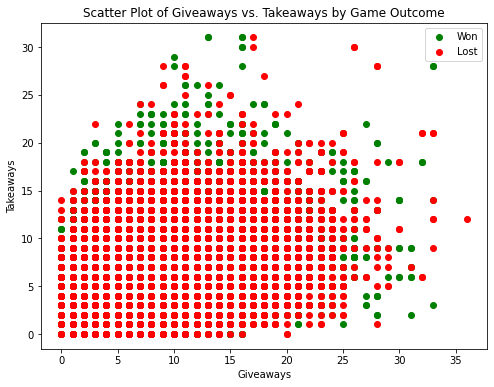

In [24]:
# Split the DataFrame into two based on the "won" column
df_won = data[data['won'] == True]
df_lost = data[data['won'] == False]

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot giveaways vs. takeaways for games won (color green)
plt.scatter(df_won['giveaways'], df_won['takeaways'], color='green', label='Won')

# Plot giveaways vs. takeaways for games lost (color red)
plt.scatter(df_lost['giveaways'], df_lost['takeaways'], color='red', label='Lost')

# Set labels and title
plt.xlabel('Giveaways')
plt.ylabel('Takeaways')
plt.title('Scatter Plot of Giveaways vs. Takeaways by Game Outcome')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [46]:
home_team_df = data[data['HoA'] == 'home'].set_index('game_id')
away_team_df = data[data['HoA'] == 'away'].set_index('game_id')

# Merge the two DataFrames based on 'game_id'
combined_df = home_team_df.merge(away_team_df, on='game_id', suffixes=('_home', '_away'))

# Reset the index to have 'game_id' as a column
combined_df.reset_index(inplace=True)
combined_df = combined_df.reindex(sorted(combined_df.columns), axis=1)
new_order = ['game_id'] + [col for col in combined_df.columns if col != 'game_id']
combined_df = combined_df[new_order]
combined_df = combined_df.drop(['HoA_away', 'HoA_home', 'head_coach_away', 'head_coach_home', 'settled_in_away', 'startRinkSide_away', 'startRinkSide_home'], axis=1)
combined_df.rename(columns={'settled_in_home': 'settled_in'}, inplace=True)

print(combined_df.iloc[5])
combined_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18963 entries, 0 to 18962
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   game_id                      18963 non-null  int64  
 1   blocked_away                 18963 non-null  float64
 2   blocked_home                 18963 non-null  float64
 3   faceOffWinPercentage_away    18963 non-null  float64
 4   faceOffWinPercentage_home    18963 non-null  float64
 5   giveaways_away               18963 non-null  float64
 6   giveaways_home               18963 non-null  float64
 7   goals_away                   18963 non-null  float64
 8   goals_home                   18963 non-null  float64
 9   hits_away                    18963 non-null  float64
 10  hits_home                    18963 non-null  float64
 11  pim_away                     18963 non-null  float64
 12  pim_home                     18963 non-null  float64
 13  powerPlayGoals_a

In [43]:
#make an aleternative df where numerical values are normalized to [0, 1]
scaler = MinMaxScaler()
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_data_norm = combined_df.copy()
combined_data_norm[num_cols] = scaler.fit_transform(combined_df[num_cols])
combined_data_norm.head()

,game_id,blocked_away,blocked_home,faceOffWinPercentage_away,faceOffWinPercentage_home,giveaways_away,giveaways_home,goals_away,goals_home,hits_away,...,powerPlayPercentage_home,settled_in,shots_away,shots_home,takeaways_away,takeaways_home,team_id_away,team_id_home,won_away,won_home
0,0.665901,0.163934,0.225,0.546279,0.453721,0.387097,0.444444,0.4,0.7,0.383562,...,0.666667,REG,0.320755,0.230769,0.310345,0.258065,0.056604,0.288462,False,True
1,0.776969,0.213115,0.350,0.417423,0.582577,0.225806,0.138889,0.4,0.3,0.191781,...,0.500000,OT,0.452830,0.294872,0.137931,0.193548,0.433962,0.115385,True,False
2,0.554948,0.311475,0.225,0.451906,0.548094,0.419355,0.361111,0.4,0.1,0.205479,...,0.000000,REG,0.358491,0.141026,0.172414,0.225806,0.377358,0.980769,True,False
3,0.555008,0.245902,0.325,0.192377,0.807623,0.129032,0.333333,0.1,0.2,0.260274,...,0.400000,REG,0.207547,0.243590,0.482759,0.354839,0.962264,0.211538,False,True
4,0.776944,0.098361,0.525,0.615245,0.384755,0.322581,0.361111,0.1,0.2,0.246575,...,0.166667,REG,0.245283,0.397436,0.137931,0.129032,0.358491,0.442308,False,True
